In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("himanshunakrani/iris-dataset")

print("Path to dataset files:", path)

c:\Users\Maquina de Mistério\AppData\Local\pypoetry\Cache\virtualenvs\estudo-eMCXyfcp-py3.13\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\Maquina de Mistério\.cache\kagglehub\datasets\himanshunakrani\iris-dataset\versions\1


In [5]:
import pandas as pd
df = pd.read_csv("iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [7]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


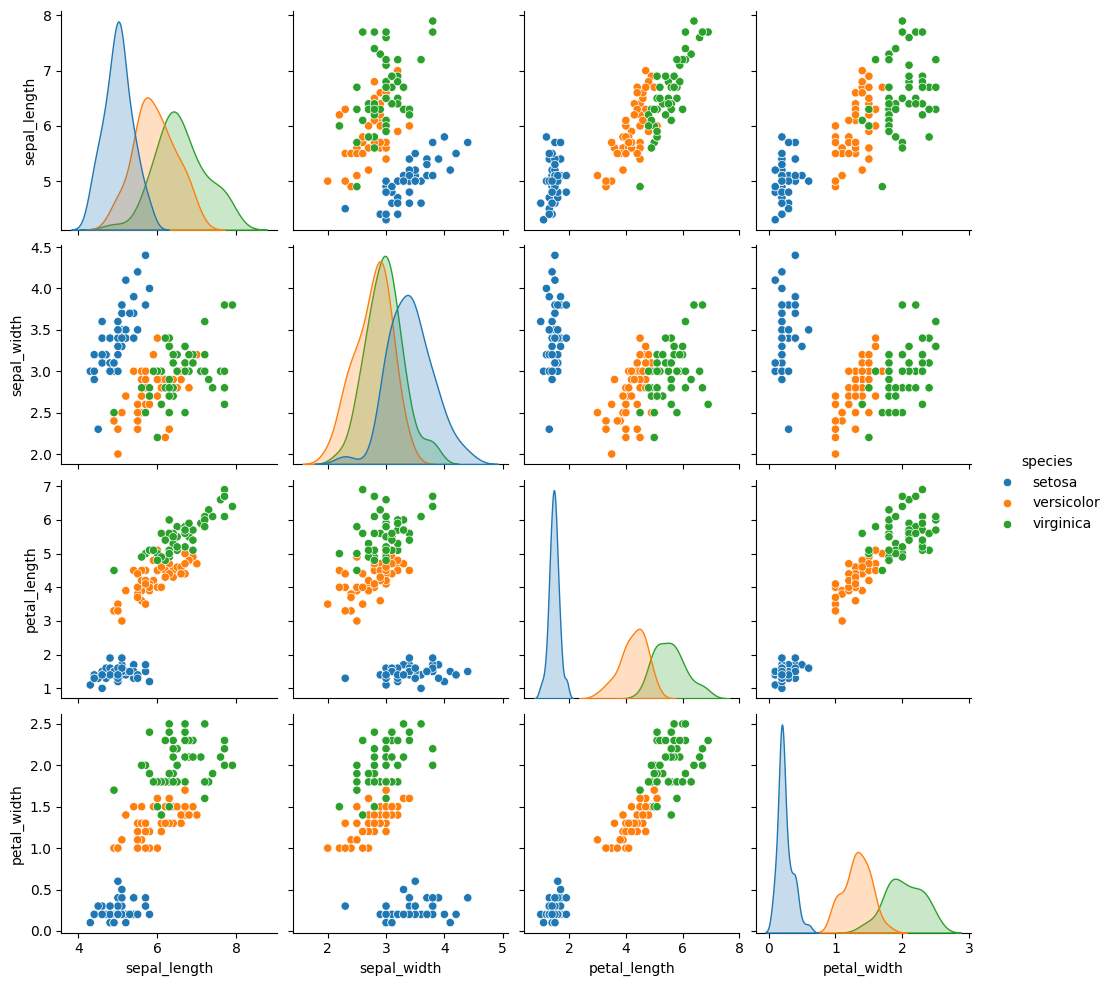

In [8]:
import seaborn as sns

import matplotlib.pyplot as plt

sns.pairplot(df, hue='species')
plt.show()

In [48]:
df_numeric = df.select_dtypes(include=[np.number])

<Axes: >

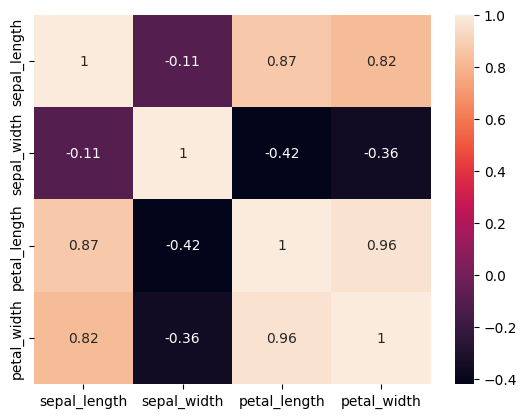

In [50]:
sns.heatmap(df_numeric.corr(), annot=True)

In [55]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [58]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
mapeamento = {
    'setosa': 0,
    'versicolor': 1,
    'virginica': 2
}

df['species'] = df['species'].map(mapeamento)

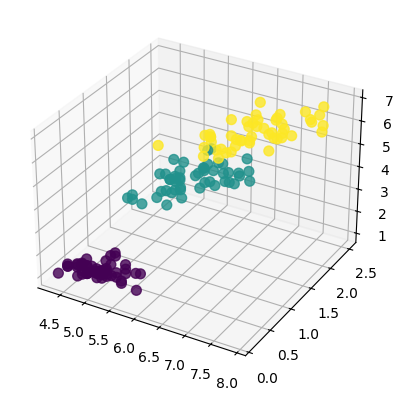

In [64]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

colors = df["species"]  

scatter = ax.scatter(
    df["sepal_length"], df["petal_width"], df["petal_length"], c=colors, cmap= plt.cm.viridis, s=50, alpha=0.8)

plt.show()

C:\Users\Maquina de Mistério\AppData\Local\Temp\ipykernel_16220\1182120267.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y=feature, data=df, palette=palette)


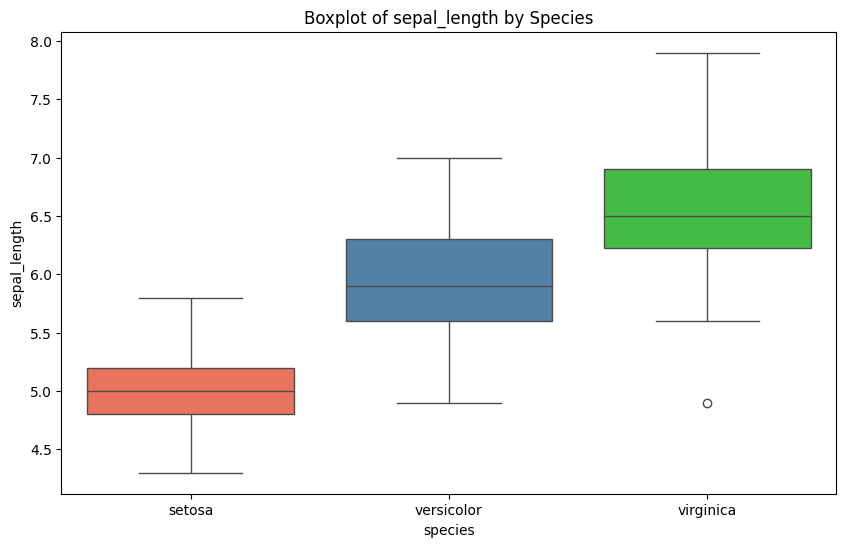

C:\Users\Maquina de Mistério\AppData\Local\Temp\ipykernel_16220\1182120267.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y=feature, data=df, palette=palette)


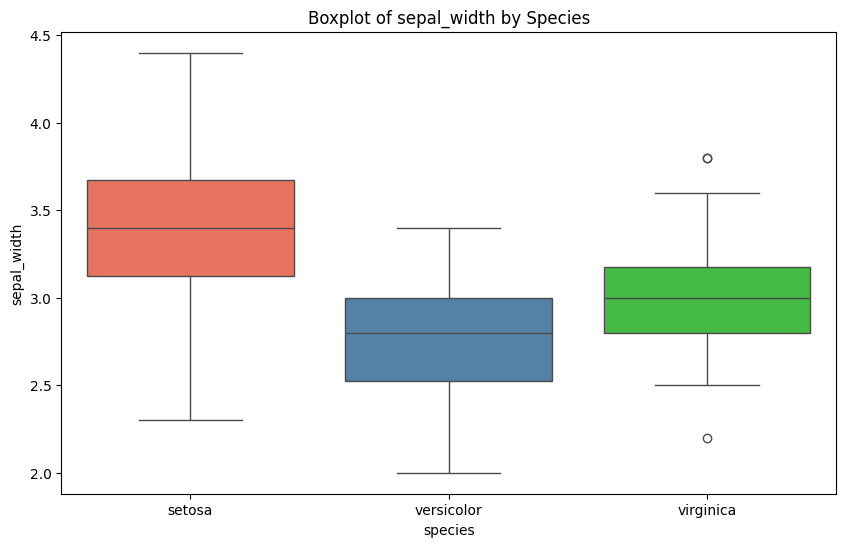

C:\Users\Maquina de Mistério\AppData\Local\Temp\ipykernel_16220\1182120267.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y=feature, data=df, palette=palette)


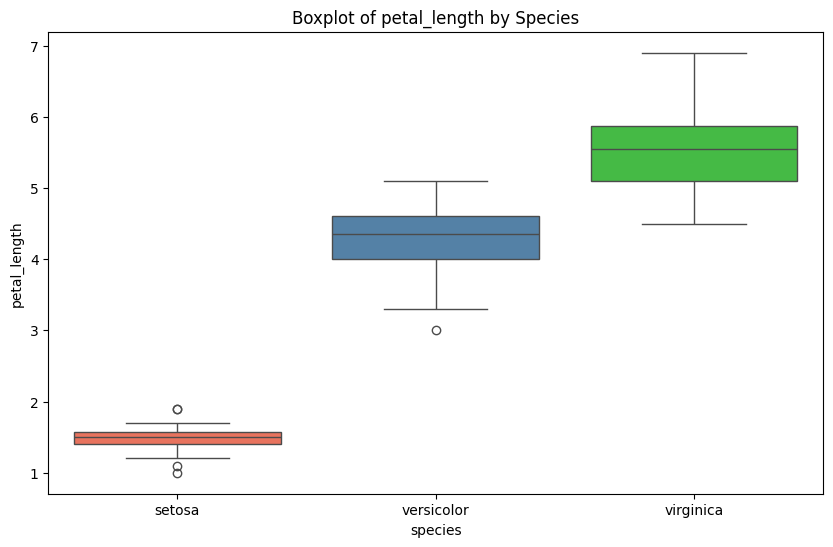

C:\Users\Maquina de Mistério\AppData\Local\Temp\ipykernel_16220\1182120267.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y=feature, data=df, palette=palette)


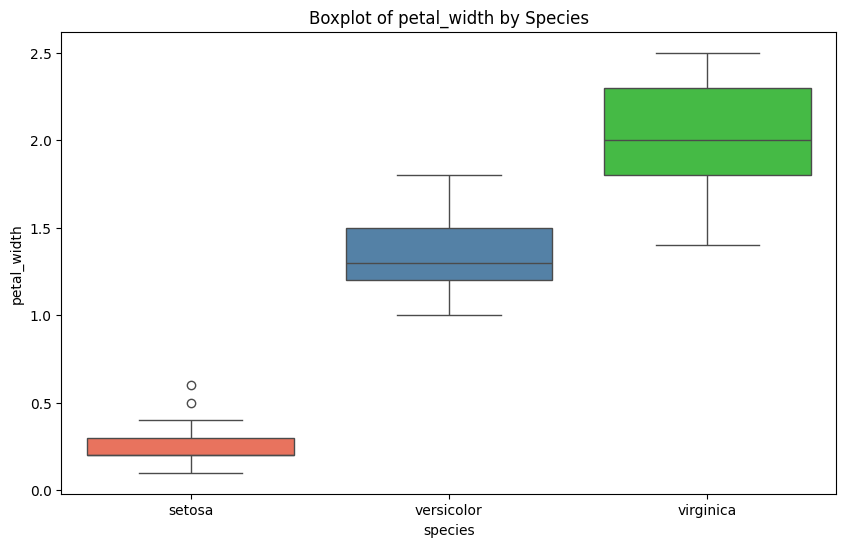

In [9]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
palette = ['#FF6347', '#4682B4', '#32CD32']  # Distinct colors

for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='species', y=feature, data=df, palette=palette)
    plt.title(f'Boxplot of {feature} by Species')
    plt.show()

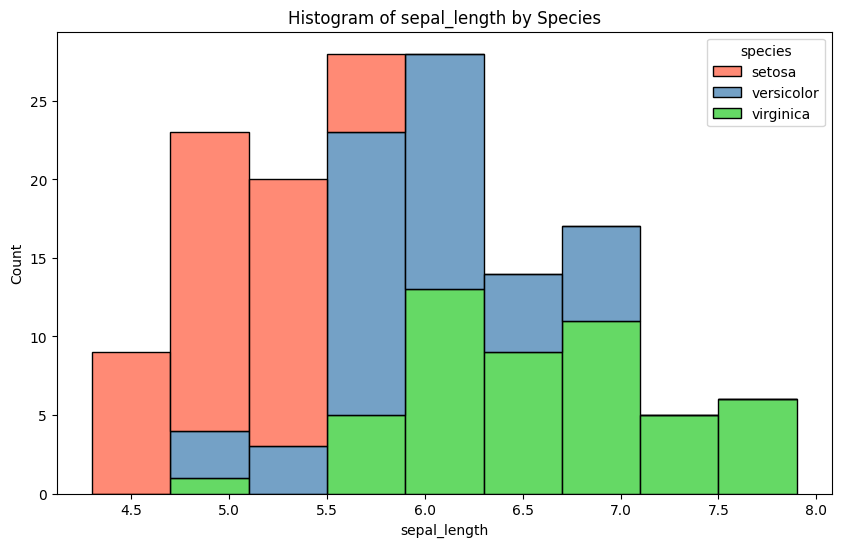

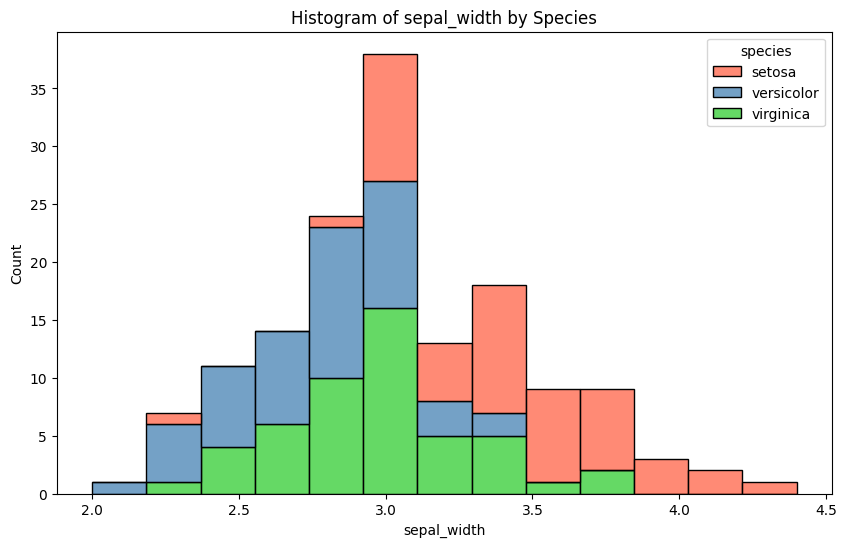

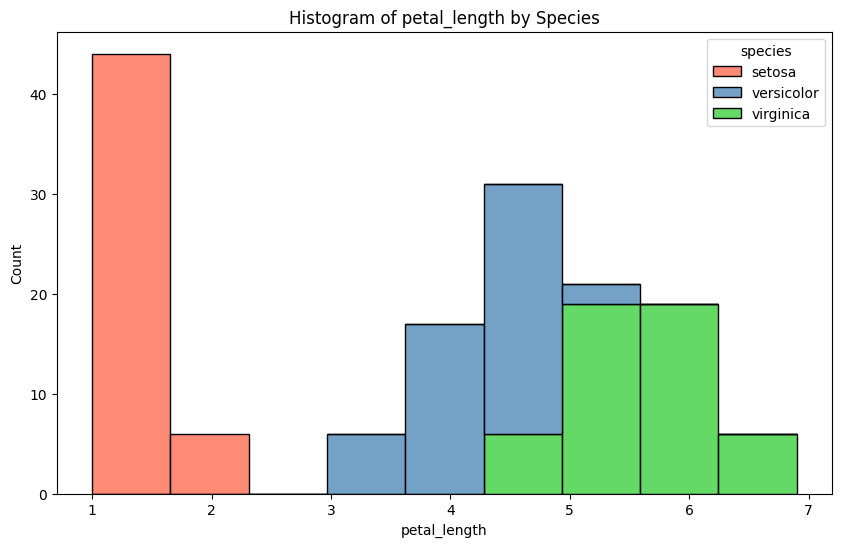

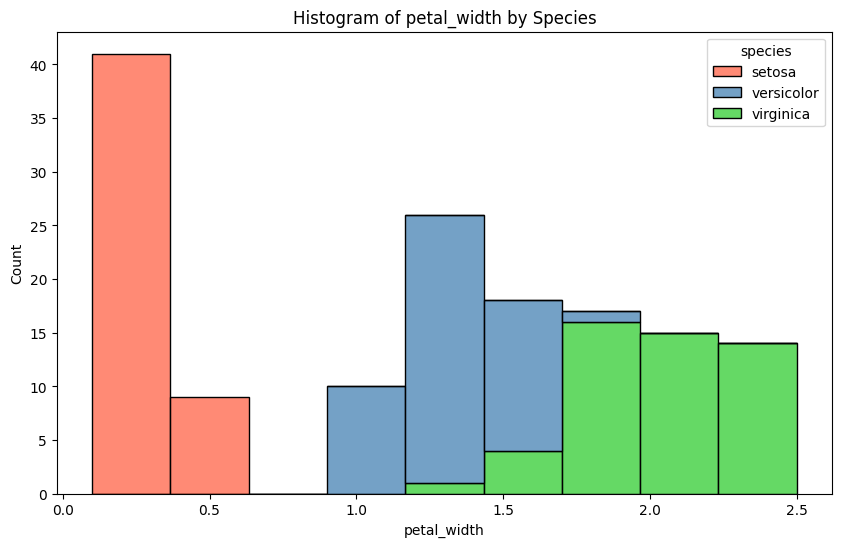

In [10]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
palette = ['#FF6347', '#4682B4', '#32CD32']  # Distinct colors

for feature in features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=feature, hue='species', multiple='stack', palette=palette)
    plt.title(f'Histogram of {feature} by Species')
    plt.show()

In [27]:
from sklearn.model_selection import train_test_split

# Separando as features e o target
X = df.drop(columns=['species'])
y = df['species']

# Dividindo o dataframe em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)


In [28]:
y_train.value_counts()

species
setosa        35
virginica     35
versicolor    35
Name: count, dtype: int64

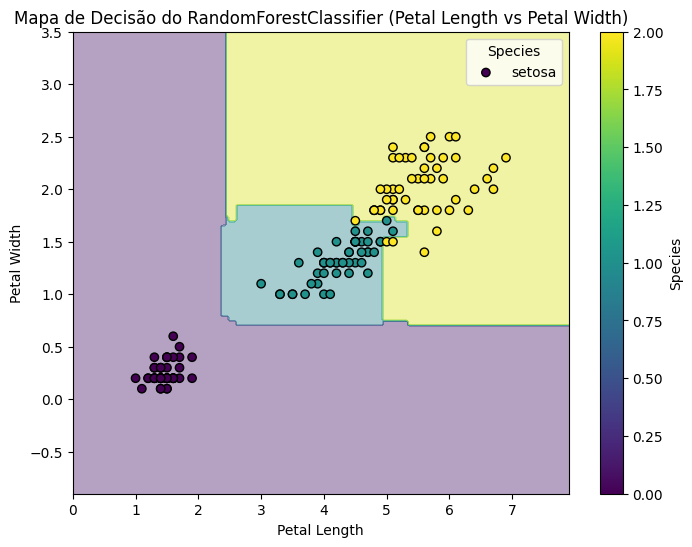

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

# Carregar o conjunto de dados iris
iris = load_iris()
X = iris.data[:, 2:]  # Usando petal_length e petal_width
y = iris.target  # Classes (espécies)

# Treinar o modelo
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X, y)

# Criar a malha para prever
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

# Prever na malha
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])  # Prever para cada ponto na malha
Z = Z.reshape(xx.shape)  # Ajustar para o formato correto

# Plotar o mapa de decisão
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.viridis)
# Plotar os pontos de dados originais, coloridos por espécie
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.viridis, label='Species')
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("Mapa de Decisão do RandomForestClassifier (Petal Length vs Petal Width)")
plt.colorbar(label='Species')  # Adicionar uma barra de cores para as espécies
plt.legend(title='Species', labels=iris.target_names)  # Adicionar legenda para as espécies
plt.show()

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Instanciando o LabelEncoder
le = LabelEncoder()

# Criando o modelo
model = RandomForestClassifier(n_estimators=100, random_state=1)

# Treinando o modelo
model.fit(X_train, y_train)

# Fazendo previsões
y_pred = model.predict(X_test)

# Avaliando o modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.9777777777777777
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

